In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('player_stats.csv', encoding='utf-8', errors='replace') as file:
    df = pd.read_csv(file)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5682 non-null   object 
 1   country         5682 non-null   object 
 2   height          5682 non-null   int64  
 3   weight          5682 non-null   int64  
 4   age             5682 non-null   int64  
 5   club            5682 non-null   object 
 6   ball_control    5682 non-null   int64  
 7   dribbling       5682 non-null   int64  
 8   marking         0 non-null      float64
 9   slide_tackle    5682 non-null   int64  
 10  stand_tackle    5682 non-null   int64  
 11  aggression      5682 non-null   int64  
 12  reactions       5682 non-null   int64  
 13  att_position    5682 non-null   int64  
 14  interceptions   5682 non-null   int64  
 15  vision          5682 non-null   int64  
 16  composure       5682 non-null   int64  
 17  crossing        5682 non-null   i

In [3]:
df = df.drop(columns=['marking'])
df['value'] = df['value'].replace({'\$': ''}, regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Taufiq\AppData\Local\Temp\ipykernel_27860\1232630976.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['value'] = df['value'].replace({'\$': ''}, regex=True)


In [4]:
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,68,73,...,32,34,41,33,10,11,6,7,9,1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,56,58,...,65,62,48,46,12,15,14,8,14,975.00
2,Thomas Dähne,Germany,193,84,29,Holstein Kiel,25,12,13,16,...,20,15,26,16,64,74,65,68,74,1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,66,69,...,25,13,22,19,10,10,8,14,9,650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,14,16,...,9,10,16,5,61,59,62,64,64,300.00


In [5]:
midfielder_features = ['ball_control', 'dribbling', 'short_pass', 'long_pass', 
                       'vision', 'composure', 'crossing', 'stamina']
forward_features = ['finishing', 'shot_power', 'dribbling', 'acceleration', 
                    'sprint_speed', 'agility', 'heading', 'att_position']
defender_features = ['interceptions', 'stand_tackle', 'slide_tackle', 
                     'strength', 'jumping', 'heading', 'aggression']
goalkeeper_features = ['gk_reflexes', 'gk_diving', 'gk_handling', 'gk_positioning', 'gk_kicking']
df_midfielder = df[midfielder_features]
print("Fitur teknis untuk gelandang:\n", df_midfielder.head())
df_forward = df[forward_features]
print("\nFitur teknis untuk penyerang:\n", df_forward.head())
df_defender = df[defender_features]
print("\nFitur teknis untuk bek:\n", df_defender.head())
df_goalkeeper = df[goalkeeper_features]
print("\nFitur teknis untuk kiper:\n", df_goalkeeper.head())

Fitur teknis untuk gelandang:
    ball_control  dribbling  short_pass  long_pass  vision  composure  \
0            55         43          64         49      30         50   
1            69         70          63         63      64         54   
2            25         12          35         18      49         48   
3            46         48          58         53      29         70   
4            14          8          23         20      38         34   

   crossing  stamina  
0        33       55  
1        60       87  
2        14       38  
3        44       73  
4        11       28  

Fitur teknis untuk penyerang:
    finishing  shot_power  dribbling  acceleration  sprint_speed  agility  \
0         30          54         43            41            52       43   
1         64          60         70            64            67       65   
2         14          51         12            46            48       36   
3         24          32         48            35            6

In [6]:
df['forward_overall'] = df[forward_features].mean(axis=1)
df['midfielder_overall'] = df[midfielder_features].mean(axis=1)
df['defender_overall'] = df[defender_features].mean(axis=1)
df['goalkeeper_overall'] = df[goalkeeper_features].mean(axis=1)

print(df[['player', 'forward_overall', 'midfielder_overall', 'defender_overall', 'goalkeeper_overall']].head())

                     player  forward_overall  midfielder_overall  \
0  Cristian Castro Devenish           44.625              47.375   
1          Silaldo Taffarel           64.125              66.250   
2              Thomas Dähne           30.125              29.875   
3         Michael Sollbauer           46.750              52.625   
4             Diego Segovia           23.250              22.000   

   defender_overall  goalkeeper_overall  
0         68.428571                 8.6  
1         63.714286                12.6  
2         31.571429                69.0  
3         71.571429                10.2  
4         24.857143                62.0  


In [7]:
def assign_position(row):
    positions = {
        'Forward': row['forward_overall'],
        'Midfielder': row['midfielder_overall'],
        'Defender': row['defender_overall'],
        'Goalkeeper': row['goalkeeper_overall']
    }
    return max(positions, key=positions.get)
df['position'] = df.apply(assign_position, axis=1)
print(df[['player', 'position', 'forward_overall', 'midfielder_overall', 'defender_overall', 'goalkeeper_overall']].head())

                     player    position  forward_overall  midfielder_overall  \
0  Cristian Castro Devenish    Defender           44.625              47.375   
1          Silaldo Taffarel  Midfielder           64.125              66.250   
2              Thomas Dähne  Goalkeeper           30.125              29.875   
3         Michael Sollbauer    Defender           46.750              52.625   
4             Diego Segovia  Goalkeeper           23.250              22.000   

   defender_overall  goalkeeper_overall  
0         68.428571                 8.6  
1         63.714286                12.6  
2         31.571429                69.0  
3         71.571429                10.2  
4         24.857143                62.0  


In [8]:
def calculate_overall(row):
    if row['position'] == 'Midfielder':
        return row['midfielder_overall']
    elif row['position'] == 'Forward':
        return row['forward_overall']
    elif row['position'] == 'Defender':
        return row['defender_overall']
    elif row['position'] == 'Goalkeeper':
        return row['goalkeeper_overall']
    else:
        return None

df['estimated_overall'] = df.apply(calculate_overall, axis=1)
print(df[['player', 'position', 'estimated_overall', 'value']].head(10))

                     player    position  estimated_overall      value
0  Cristian Castro Devenish    Defender          68.428571  1.400.000
1          Silaldo Taffarel  Midfielder          66.250000    975.00 
2              Thomas Dähne  Goalkeeper          69.000000  1.100.000
3         Michael Sollbauer    Defender          71.571429    650.00 
4             Diego Segovia  Goalkeeper          62.000000    300.00 
5             Cláudio Ramos  Goalkeeper          72.200000  2.800.000
6            Cédric Zesiger    Defender          72.285714  1.600.000
7               Pedro Gomes    Defender          63.000000    230.00 
8           Famara Diédhiou     Forward          67.750000  1.400.000
9              Sibiry Keita     Forward          65.375000    475.00 


In [9]:
def remove_thousand_separator(val):
    return val.replace('.', '')
def adjust_value(val):
    if val < 100000:
        val = val / 100
    return val
df['value'] = df['value'].apply(lambda x: remove_thousand_separator(x))
df['value'] = df['value'].astype(float)
df['value'] = df['value'].apply(lambda x: adjust_value(x))
print(df[['player', 'position', 'estimated_overall', 'value']].head(10))


                     player    position  estimated_overall      value
0  Cristian Castro Devenish    Defender          68.428571  1400000.0
1          Silaldo Taffarel  Midfielder          66.250000      975.0
2              Thomas Dähne  Goalkeeper          69.000000  1100000.0
3         Michael Sollbauer    Defender          71.571429      650.0
4             Diego Segovia  Goalkeeper          62.000000      300.0
5             Cláudio Ramos  Goalkeeper          72.200000  2800000.0
6            Cédric Zesiger    Defender          72.285714  1600000.0
7               Pedro Gomes    Defender          63.000000      230.0
8           Famara Diédhiou     Forward          67.750000  1400000.0
9              Sibiry Keita     Forward          65.375000      475.0


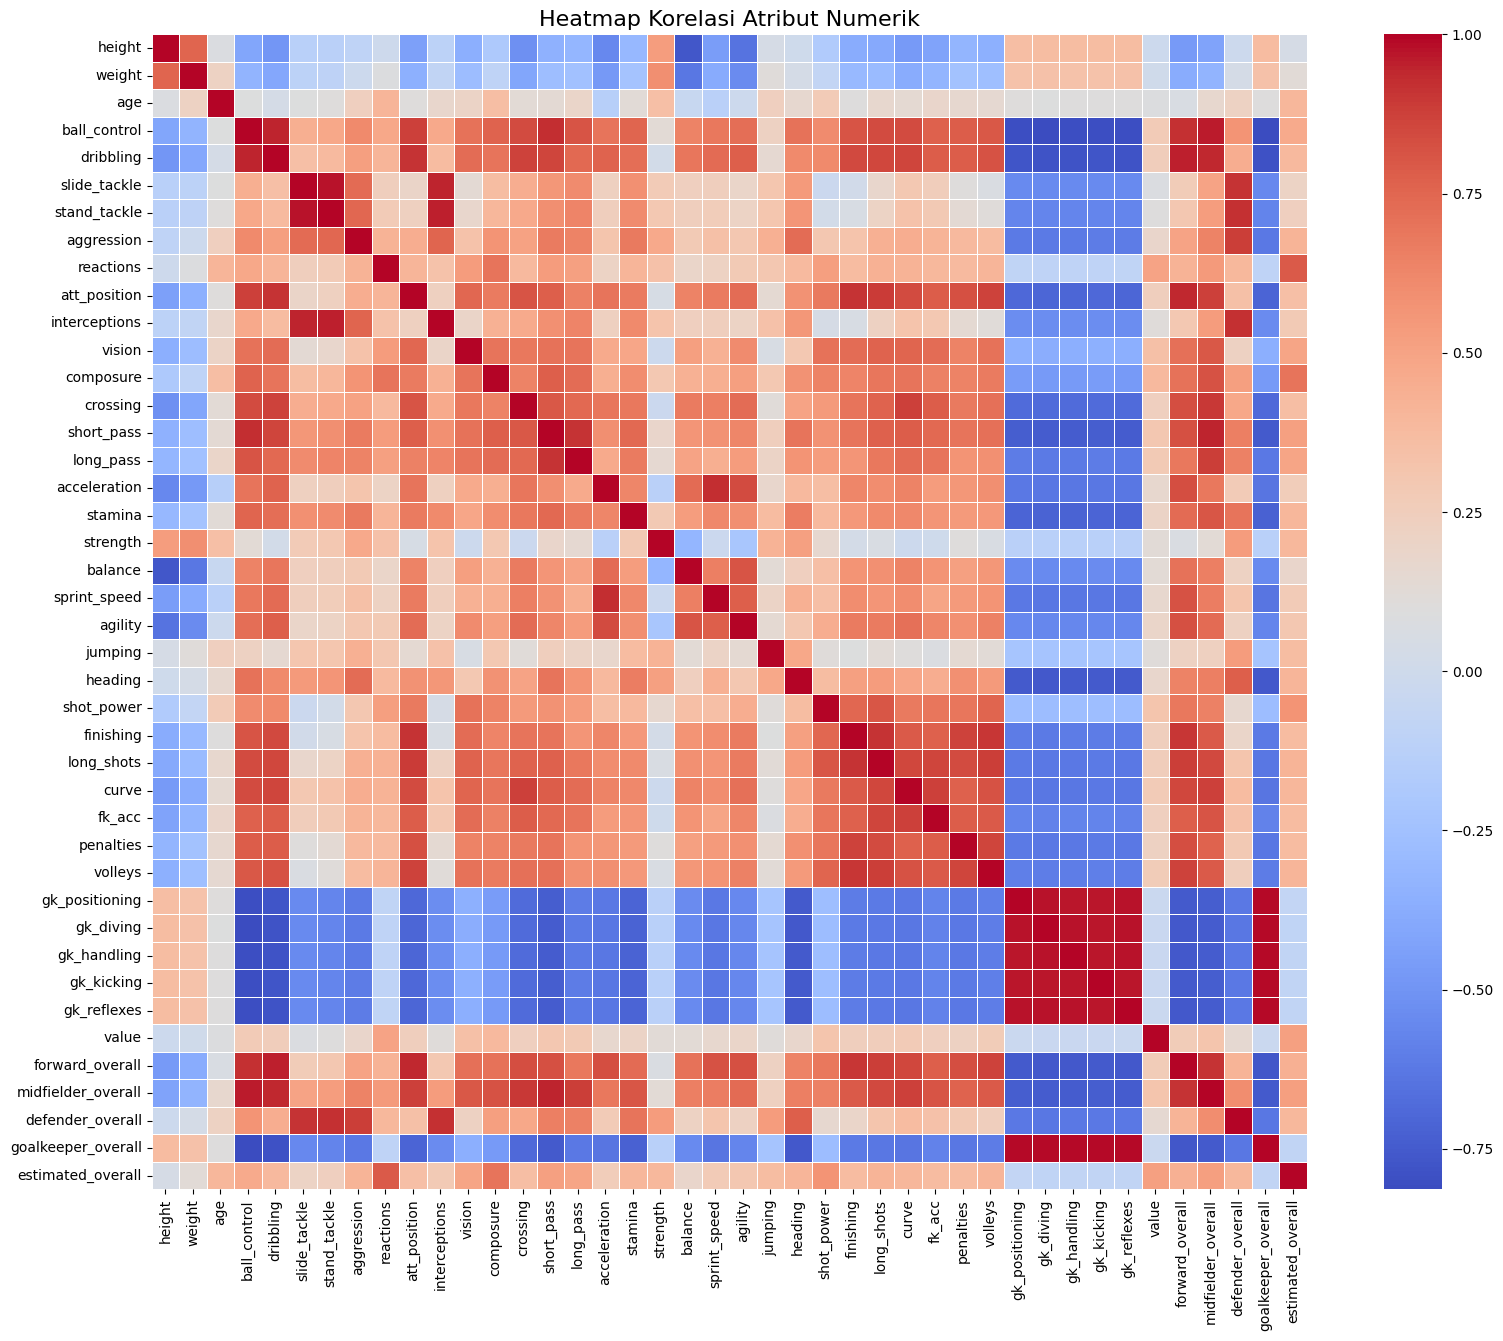

In [10]:
excluded_columns = ['player', 'country', 'club','position']
numerical_df = df.drop(columns=excluded_columns)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(20, 15))  
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', 
            cbar=True, linewidths=0.5, square=True)
plt.title('Heatmap Korelasi Atribut Numerik', fontsize=16)
plt.show()


In [11]:
scaler = StandardScaler()
df[['estimated_overall_', 'value_']] = scaler.fit_transform(df[['estimated_overall', 'value']])
print(df[['player', 'estimated_overall_', 'value_']].head())

                     player  estimated_overall_    value_
0  Cristian Castro Devenish            0.278146 -0.110822
1          Silaldo Taffarel           -0.053725 -0.294343
2              Thomas Dähne            0.365193 -0.150176
3         Michael Sollbauer            0.756909 -0.294386
4             Diego Segovia           -0.701143 -0.294432


Running Elbow Method...
Converged after 2 iterations.
Converged after 22 iterations.
Converged after 36 iterations.
Converged after 47 iterations.
Converged after 47 iterations.
Converged after 48 iterations.
Converged after 85 iterations.
Converged after 53 iterations.
Converged after 61 iterations.
Converged after 74 iterations.


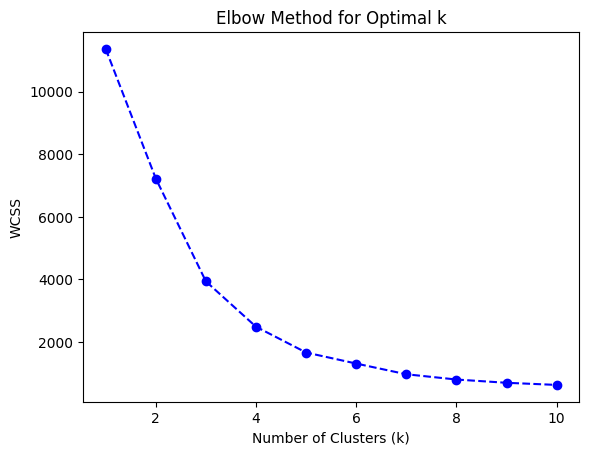

In [12]:
import random

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans(df, k, max_iterations=100):
    centroids = random.sample(list(df), k)

    for iteration in range(max_iterations):
        clusters = [[] for _ in range(k)]

        for point in df:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid = distances.index(min(distances))
            clusters[closest_centroid].append(point)

        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_centroid = np.mean(cluster, axis=0) 
                new_centroids.append(new_centroid)
            else:
                new_centroids.append(random.choice(df)) 

        if np.array_equal(centroids, new_centroids):
            print(f"Converged after {iteration + 1} iterations.")
            break
        centroids = new_centroids

    return clusters, centroids
def calculate_wcss(df, clusters, centroids):
    wcss = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            wcss += euclidean_distance(point, centroids[i]) ** 2
    return wcss

def elbow_method(df, max_k=10):
    wcss_values = []
    for k in range(1, max_k + 1):
        clusters, centroids = kmeans(df, k)
        wcss = calculate_wcss(df, clusters, centroids)
        wcss_values.append(wcss)
    return wcss_values

X = df[['estimated_overall_', 'value_']].values

max_k = 10
print("Running Elbow Method...")
wcss_values = elbow_method(X, max_k=max_k)

plt.plot(range(1, max_k + 1), wcss_values, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [13]:
from joblib import dump, load

def save_kmeans_model(centroids, clusters, filename):
    model = {'centroids': centroids, 'clusters': clusters}
    dump(model, filename)
    print(f"Model K-Means telah disimpan ke file: {filename}")

def load_kmeans_model(filename):
    model = load(filename)
    print(f"Model K-Means telah dimuat dari file: {filename}")
    return model['centroids'], model['clusters']


In [14]:
optimal_k = 4
print(f"Running K-Means with k={optimal_k}...")
clusters, centroids = kmeans(X, optimal_k)
cluster_kmeans = []

save_kmeans_model(centroids, clusters, 'kmeans_model.joblib')
loaded_centroids, loaded_clusters = load_kmeans_model('kmeans_model.joblib')
print("Centroids yang dimuat:")
print(loaded_centroids)

for i, point in enumerate(X):
    distances = [euclidean_distance(point, centroid) for centroid in loaded_centroids]
    closest_centroid = distances.index(min(distances))
    cluster_kmeans.append(closest_centroid)

df['Cluster'] = cluster_kmeans

print(df[['player', 'Cluster']].head())


Running K-Means with k=4...
Converged after 42 iterations.
Model K-Means telah disimpan ke file: kmeans_model.joblib
Model K-Means telah dimuat dari file: kmeans_model.joblib
Centroids yang dimuat:
[array([ 0.54245424, -0.08370815]), array([-0.91587376, -0.28631917]), array([1.88237889, 2.3211747 ]), array([ 2.93856646, 10.55198051])]
                     player  Cluster
0  Cristian Castro Devenish        0
1          Silaldo Taffarel        0
2              Thomas Dähne        0
3         Michael Sollbauer        0
4             Diego Segovia        1


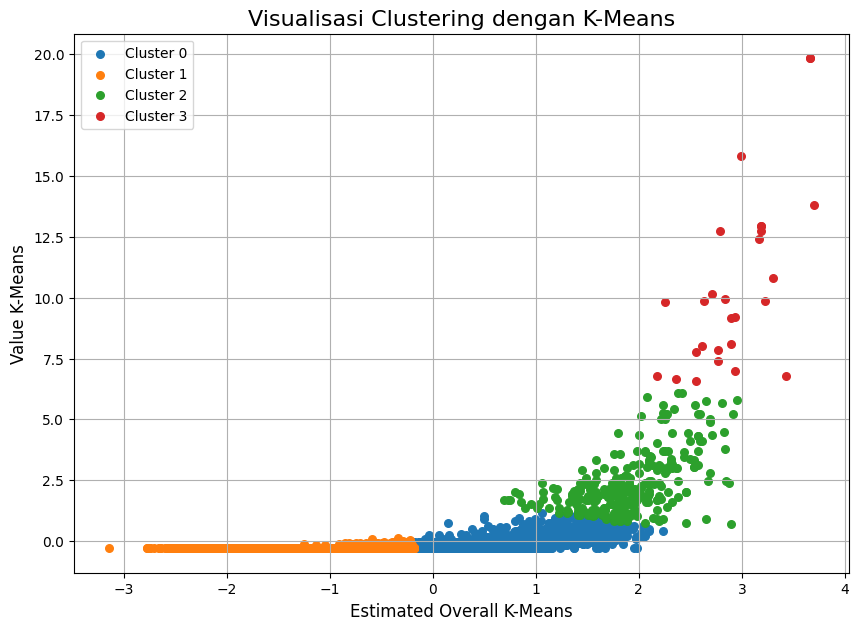

In [15]:
df['Cluster'] = cluster_kmeans  
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_data = X[np.array(cluster_kmeans) == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                s=30, label=f'Cluster {cluster}')

plt.title('Visualisasi Clustering dengan K-Means', fontsize=16)
plt.xlabel('Estimated Overall K-Means', fontsize=12)
plt.ylabel('Value K-Means', fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [16]:
clustered_data = df[['player', 'estimated_overall', 'value', 'age', 'Cluster']]
result = []
for cluster_id in clustered_data['Cluster'].unique():
    cluster_players = clustered_data[clustered_data['Cluster'] == cluster_id]
    sorted_players = cluster_players.sort_values(by='estimated_overall', ascending=False)
    result.append(sorted_players)
final_result = pd.concat(result)
final_result.to_csv('clustered_players.csv', index=False)


In [17]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, cluster_kmeans)

print(f"Average Silhouette Score: {silhouette_avg}")


Average Silhouette Score: 0.5254177941048074


In [18]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X, cluster_kmeans)

print(f"Davies-Bouldin Index untuk hasil clustering: {db_index}")


Davies-Bouldin Index untuk hasil clustering: 0.5708771757207529


In [19]:
new_player = [[98, 49000000]]

def predict_cluster(new_data, centroids):
    predictions = []
    for point in new_data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        predictions.append(distances.index(min(distances)))
    return predictions
predicted_cluster = predict_cluster(new_player, loaded_centroids)
print(f"Pemain baru dengan data {new_player} masuk ke cluster: {predicted_cluster[0]}")


Pemain baru dengan data [[98, 49000000]] masuk ke cluster: 3


In [20]:
numeric_df = df.select_dtypes(include=['number'])
cluster_stats = numeric_df.groupby('Cluster').agg(['mean', 'median', 'min', 'max'])
selected_columns = ['estimated_overall', 'value']
filtered_stats = cluster_stats[selected_columns]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)     
pd.set_option('display.width', 1000) 
filtered_stats


estimated_overall                                          value                                     
                     mean     median        min        max          mean      median         min          max
Cluster                                                                                                      
0               70.163634  69.625000  65.285714  81.285714  1.606699e+06   1200000.0        25.0   11000000.0
1               60.590394  61.500000  46.000000  65.428571  6.214544e+04       325.0         4.0    3300000.0
2               78.959612  78.828571  71.125000  86.000000  1.993972e+07  17500000.0   7500000.0   48500000.0
3               85.892989  85.625000  80.875000  90.875000  8.268519e+07  77500000.0  52500000.0  153500000.0